In [13]:
##### Config
from pyspark import SparkConf, SparkContext, HiveContext
import re
import numpy as np
import pandas as pd
import datetime

hive_config_query = '''
set hive.vectorized.execution.enabled=true;
set hive.vectorized.execution.reduce.enabled = true;
set mapreduce.map.memory.mb=4096;
set mapreduce.map.child.java.opts=-Xmx4g;
set mapreduce.task.io.sort.mb=1024;
set mapreduce.reduce.child.java.opts=-Xmx4g;
set mapreduce.reduce.memory.mb=7000;
set mapreduce.reduce.shuffle.input.buffer.percent=0.5;
set mapreduce.input.fileinputformat.split.minsize=536870912;
set mapreduce.input.fileinputformat.split.maxsize=1073741824;
set hive.optimize.ppd=true;
set hive.merge.smallfiles.avgsize=536870912;
set hive.merge.mapredfiles=true;
set hive.merge.mapfiles=true;
set hive.hadoop.supports.splittable.combineinputformat=true;
set hive.exec.reducers.bytes.per.reducer=536870912;
set hive.exec.parallel=true;
set hive.exec.max.created.files=10000000;
set hive.exec.compress.output=true;
set hive.exec.dynamic.partition.mode=nonstrict;
set hive.exec.max.dynamic.partitions=1000000;
set hive.exec.max.dynamic.partitions.pernode=100000;
set io.seqfile.compression.type=BLOCK;
set mapreduce.map.failures.maxpercent=5;
'''
try:
    sc.stop()
except:
    pass
conf = (SparkConf()
        .set("spark.executor.instances", 2)
        .set("spark.driver.maxResultSize", "8g")
        .set('spark.driver.memory','8g')
        .set("spark.executor.memory", '2g')
        .set("spark.yarn.executor.memoryOverhead", 1048)
       )
sc = SparkContext(conf=conf)
hc = HiveContext(sc)

for q in hive_config_query.split(';'):
    try:
        hc.sql(q)
    except:
        pass

In [14]:
 %matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Подготовка данных

In [15]:
SAS_Query = '''

write
'''

In [26]:
df_prod = (hc.sql('''

            select 
              r.ymd as call_ymd,
              r.phone_num, 
              max(r.utm_campaign) as utm_campaign,
              max(s.segment_nm) as segment_nm,
              max(r.in_work) as in_work, 
              max(r.full_app) as full_app, 
              max(r.considered) as considered, 
              max(r.approve) as approve, 
              max(r.utilization) as utilization,
              max(
                 named_struct(
                   'ymd', s.ymd,
                   'score',s.seg_score
                   )
                 ).score as score,
              max(
                 named_struct(
                   'ymd', s.ymd,
                   'cred_score',s.cred_score
                   )
                 ).cred_score as cred_score,
              max(s.ymd) as seg_ymd
            from
              big_data_science.cold_liru_results r
              left join prod_ccall.prod_segments s on s.phone_num = r.phone_num
              where
                r.utm_campaign = 'cold_liru'
                and s.ymd between date_add(r.ymd, -7) and date_add(r.ymd, -1)
            group by r.ymd, r.phone_num


            ''')
           .toPandas()
          )

df_test = (hc.sql('''

            select 
              r.ymd as call_ymd,
              r.phone_num, 
              max(r.utm_campaign) as utm_campaign,
              max(s.segment_nm) as segment_nm,
              max(r.in_work) as in_work, 
              max(r.full_app) as full_app, 
              max(r.considered) as considered, 
              max(r.approve) as approve, 
              max(r.utilization) as utilization,
              max(
                 named_struct(
                   'ymd', s.ymd,
                   'score',s.seg_score
                   )
                 ).score as score,
              max(
                 named_struct(
                   'ymd', s.ymd,
                   'cred_score',s.cred_score
                   )
                 ).cred_score as cred_score,
              max(s.ymd) as seg_ymd
            from
              big_data_science.cold_liru_results r
              left join prod_ccall.test_segments s on s.phone_num = r.phone_num
              where
                r.utm_campaign = 'cold_liru_test'
                and s.ymd between date_add(r.ymd, -7) and date_add(r.ymd, -1)
            group by r.ymd, r.phone_num


            ''')
           .toPandas()
          )

### Зависимость от скора по продовым сегментам

In [34]:
dfm = df_prod[(df_prod['segment_nm'] == u'la_apppr_ccall_2')]
dfm

,call_ymd,phone_num,utm_campaign,segment_nm,in_work,full_app,considered,approve,utilization,score,cred_score,seg_ymd
0,2017-02-16,+79370287275,cold_liru,la_apppr_ccall_2,NaN,NaN,NaN,NaN,NaN,-4.179656,NaN,2017-02-15
1,2017-02-17,+79523934549,cold_liru,la_apppr_ccall_2,NaN,NaN,NaN,NaN,NaN,-4.705277,NaN,2017-02-14
2,2017-02-18,+79172311902,cold_liru,la_apppr_ccall_2,NaN,NaN,NaN,NaN,NaN,-4.358209,NaN,2017-02-15
3,2017-02-21,+79286939890,cold_liru,la_apppr_ccall_2,NaN,NaN,NaN,NaN,NaN,-4.567667,NaN,2017-02-15
4,2017-02-21,+79607009976,cold_liru,la_apppr_ccall_2,NaN,NaN,NaN,NaN,NaN,-4.742271,NaN,2017-02-20
5,2017-02-22,+79205993653,cold_liru,la_apppr_ccall_2,NaN,NaN,NaN,NaN,NaN,-4.968881,NaN,2017-02-20
6,2017-02-22,+79537269899,cold_liru,la_apppr_ccall_2,NaN,NaN,NaN,NaN,NaN,-4.968881,NaN,2017-02-20
7,2017-02-25,+79995302424,cold_liru,la_apppr_ccall_2,NaN,NaN,NaN,NaN,NaN,-4.848774,NaN,2017-02-24
8,2017-02-27,+79194715000,cold_liru,la_apppr_ccall_2,NaN,NaN,NaN,NaN,NaN,-4.968881,NaN,2017-02-25
9,2017-02-27,+79603004422,cold_liru,la_apppr_ccall_2,NaN,NaN,NaN,NaN,NaN,-4.108286,NaN,2017-02-26


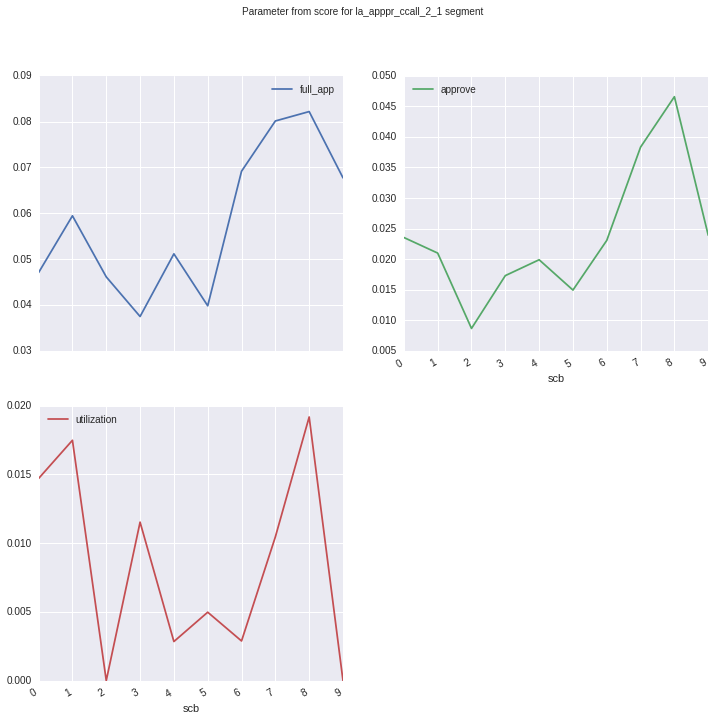

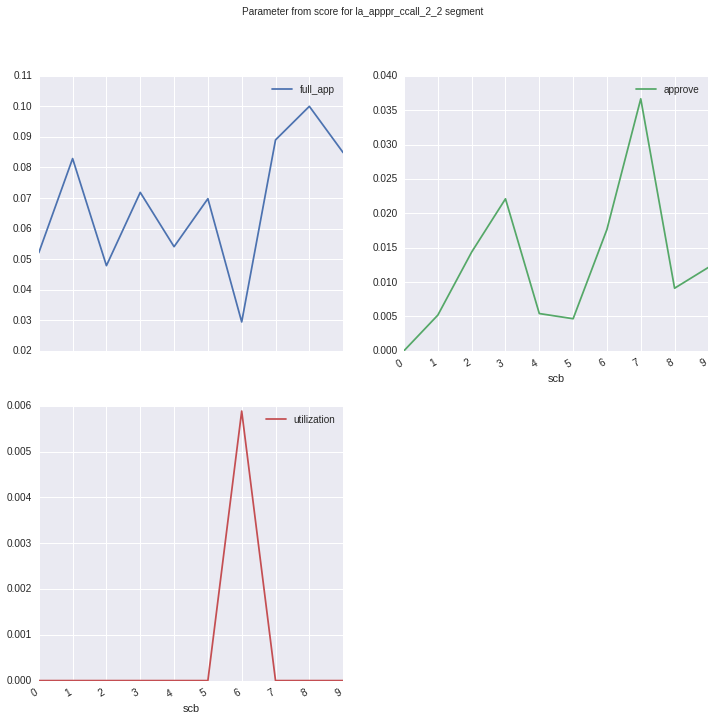

In [35]:
for segment_nm in df_prod[(df_prod['in_work'] == 0)]['segment_nm'].unique():
    dfm = df_prod[(df_prod['segment_nm'] == segment_nm) & (df_prod['in_work'] == 0)]
    dfm.loc[:,'scb'] = pd.cut(dfm['score'], bins = np.unique(dfm['score'].quantile(np.arange(0,1.1,0.1)).values), labels  = False).values
    dfm.groupby('scb')['full_app','approve','utilization'].mean() \
          .plot(subplots = 1, layout = (2,2) , title  = 'Parameter from score for ' + segment_nm + ' segment', figsize = (12,12))
        #print('-' * 100)

In [37]:
for segment_nm in df_prod[df_prod['in_work'] == 0]['segment_nm'].unique():
    idx = df_prod[(df_prod['segment_nm'] == segment_nm) & (df_prod['in_work'] == 0)].index
    df_prod.loc[idx,'scb'] = pd.cut(df_prod.loc[idx,'score'], bins = np.unique(df_prod.loc[idx,'score'].quantile(np.arange(0,1.2,0.2)).values), labels  = False).values

In [38]:
df1 = df_prod.query('in_work == 0')
df_res = pd.DataFrame(df1.groupby('scb')[['full_app','approve','utilization']].mean().values,columns = ['full_app','approve_from_all','util_from_all'])
#df1.groupby('scb')[['full_app','approve','utilization']].mean()
df_res.loc[:,'approve_from_full_app'] = df1.query('full_app == 1').groupby('scb')['approve'].mean()
df_res.loc[:,'util_from_approve'] = df1.query('approve == 1').groupby('scb')['utilization'].mean()
df_res

,full_app,approve_from_all,util_from_all,approve_from_full_app,util_from_approve
0,0.058358,0.014837,0.009891,0.254237,0.666667
1,0.047970,0.014760,0.003690,0.307692,0.250000
2,0.053515,0.012592,0.002099,0.235294,0.166667
3,0.069347,0.029146,0.005025,0.420290,0.172414
4,0.082917,0.026973,0.006993,0.325301,0.259259


### Зависимость от скора по тестовым сегментам

/opt/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=9.0, right=9.0
  'left=%s, right=%s') % (left, right))


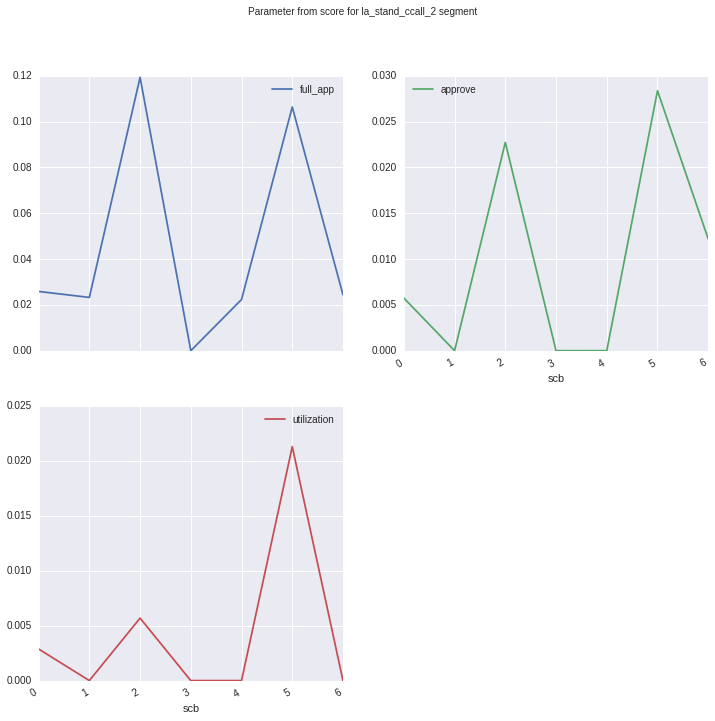

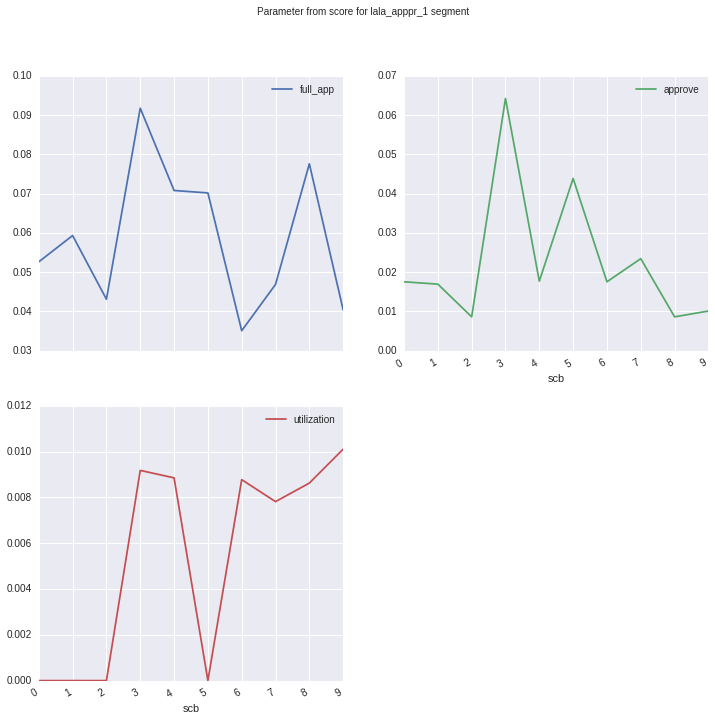

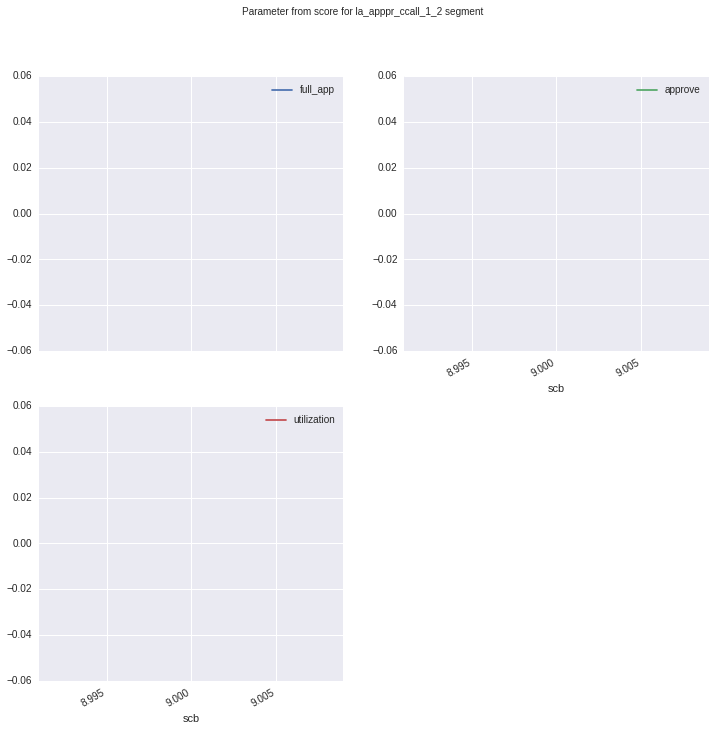

In [40]:
for segment_nm in df_test[(df_test['in_work'] == 0)]['segment_nm'].unique():
    dfm = df_test[(df_test['segment_nm'] == segment_nm) & (df_test['in_work'] == 0)]
    dfm.loc[:,'scb'] = pd.cut(dfm['score'], bins = np.unique(dfm['score'].quantile(np.arange(0,1.1,0.1)).values), labels  = False).values
    dfm.groupby('scb')['full_app','approve','utilization'].mean() \
          .plot(subplots = 1, layout = (2,2) , title  = 'Parameter from score for ' + segment_nm + ' segment', figsize = (12,12))
        #print('-' * 100)

In [42]:
for segment_nm in df_test[df_test['in_work'] == 0]['segment_nm'].unique():
    idx = df_test[(df_test['segment_nm'] == segment_nm) & (df_test['in_work'] == 0)].index
    df_test.loc[idx,'scb'] = pd.cut(df_test.loc[idx,'score'], bins = np.unique(df_test.loc[idx,'score'].quantile(np.arange(0,1.2,0.2)).values), labels  = False).values

df2 = df_test.query('in_work == 0')
df_res2 = pd.DataFrame(df2.groupby('scb')[['full_app','approve','utilization']].mean().values,columns = ['full_app','approve_from_all','util_from_all'])
#df1.groupby('scb')[['full_app','approve','utilization']].mean()
df_res2.loc[:,'approve_from_full_app'] = df2.query('full_app == 1').groupby('scb')['approve'].mean()
df_res2.loc[:,'cnt'] = df2.groupby('scb')['approve'].count()
df_res2.loc[:,'util_from_approve'] = df2.query('approve == 1').groupby('scb')['utilization'].mean()
df_res2

,full_app,approve_from_all,util_from_all,approve_from_full_app,cnt,util_from_approve
0,0.037931,0.010345,0.001724,0.272727,580,0.166667
1,0.050847,0.022599,0.002825,0.444444,354,0.125000
2,0.073852,0.021956,0.003992,0.297297,501,0.181818
3,0.033254,0.011876,0.004751,0.357143,421,0.400000
4,0.068337,0.015945,0.011390,0.233333,439,0.714286


In [ ]:
df_prod.groupby('ymd')['full_app'].mean().plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc36ddd4290>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x7fc367129a10>]], dtype=object)

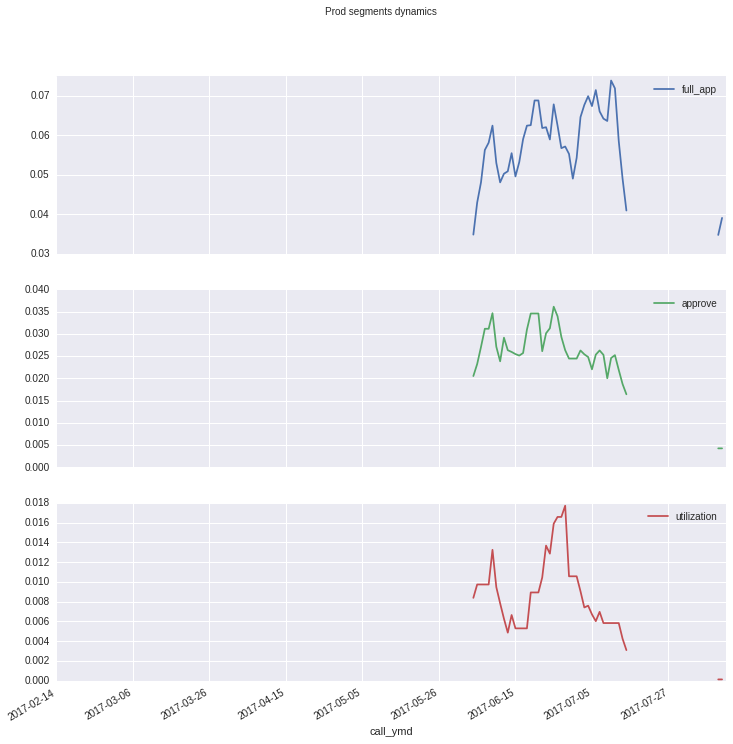

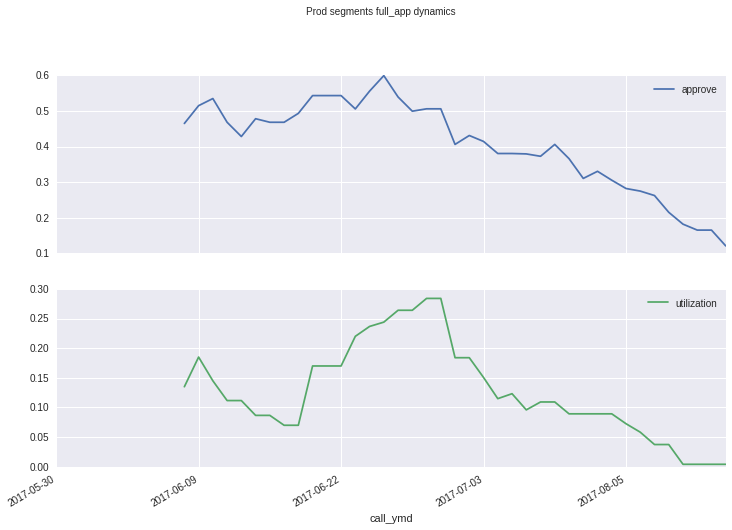

In [43]:
df_prod.groupby('call_ymd')['full_app','approve','utilization'].mean().rolling(window=10).mean() \
       .plot(subplots = 1, layout = (3,1), figsize = (12,12),title = 'Prod segments dynamics')
df_prod.query('full_app == 1').groupby('call_ymd')['approve','utilization'].mean().rolling(window=10).mean() \
       .plot(subplots = 1, layout = (3,1), figsize = (12,12),title = 'Prod segments full_app dynamics')

Test segments dynamics


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc366d89610>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x7fc38d2bef10>]], dtype=object)

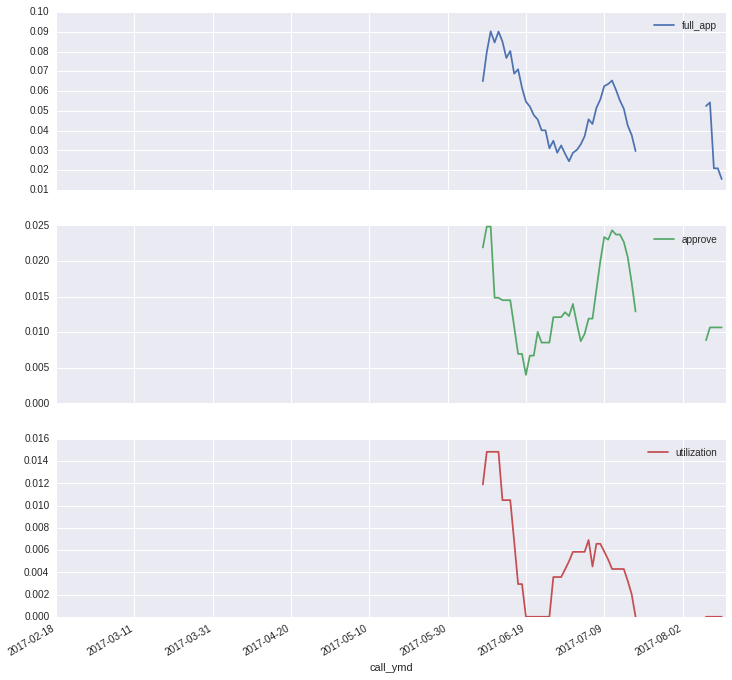

In [44]:
print('Test segments dynamics')
df_test.groupby('call_ymd')['full_app','approve','utilization'].mean().rolling(window=10).mean().plot(subplots = 1, layout = (3,1), figsize = (12,12))

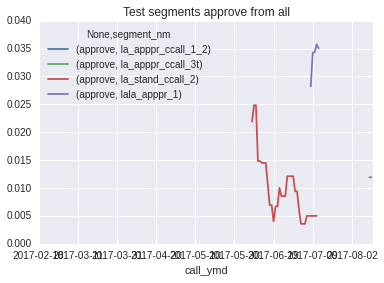

In [45]:
df_test.groupby(['call_ymd','segment_nm'])[['approve']].mean().unstack().rolling(window=10).mean().plot(title = 'Test segments approve from all')

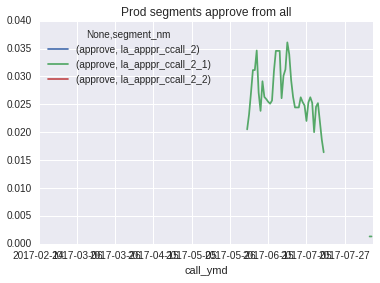

In [46]:
df_prod.groupby(['call_ymd','segment_nm'])[['approve']].mean().unstack().rolling(window=10).mean().plot(title = 'Prod segments approve from all')

### Что-то идет не так...

In [ ]:
df_test.query('(considered == 1) and call_ymd > "2017-07-01"').groupby('segment_nm')['approve'].mean()

In [ ]:
df_test.loc[:,'cred_scb'] = pd.cut(df_test.loc[:,'cred_score'], bins = np.unique(df_test.loc[:,'cred_score'].quantile(np.arange(0,1.2,0.2)).values), labels  = False).values
df_test.query('(considered == 1) and call_ymd > "2017-06-01" and cred_score >-1').groupby('cred_scb')['approve'].mean()

In [ ]:
df_prod.loc[:,'cred_scb'] = pd.cut(df_prod.loc[:,'cred_score'], bins = np.unique(df_prod.loc[:,'cred_score'].quantile(np.arange(0,1.2,0.2)).values), labels  = False).values
df_prod.query('(considered == 1) and call_ymd > "2017-06-22" and cred_score > -1').groupby('cred_scb')['approve'].mean()
#df_prod.query('cred_score > -1').groupby('cred_scb')['full_app'].mean()

#### Есть разделение по кред скору. Ужесточать?

In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np

#tst = np.random.random((16, 16))
#plt.imshow(tst, cmap='hot', interpolation='nearest')

plt.imshow(df_prod.groupby(['scb','cred_scb'])['full_app'].count().unstack(), cmap='hot', interpolation='nearest')
plt.show()
#df_prod.groupby(['scb','cred_scb'])['full_app'].count().unstack()


In [ ]:
df_test.loc[:,'cred_scb'] = pd.cut(df_test.loc[:,'cred_score'], bins = np.unique(df_test.loc[:,'cred_score'].quantile(np.arange(0,1.2,0.2)).values), labels  = False).values
#df_prod.query('(considered == 1) and call_ymd > "2017-06-22" and cred_score > -1').groupby('cred_scb')['approve'].mean()
df_test.query('cred_score > -1').groupby('cred_scb')['full_app'].mean()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

a = np.random.random((16, 16))
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

In [ ]:
#df_prod.query('call_ymd > "2017-06-22" and cred_score > -1').groupby